In [1]:
import scipy
import numpy as np
import matplotlib
import pandas as pd

In [2]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Identificar desequilibrio de clases


In [4]:
class_distribution = df.groupby('Dataset').size()
print(class_distribution)

Dataset
1    416
2    167
dtype: int64


### Identificar Corelacion entre atributos

No me refiero la s variables de entrada o salida

Es la corelacion que existe entre todas las variables dentro del dataset

queremos que estésn entre 0 , 1, -1

0 -------------> Significa que no existe correlación

1 , -1 --------> Existe mucha correlación cundo los valores esten muy cerda de este rango

In [5]:
df.corr()

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_30524\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


### Sesgo de la distribucion

Asimetria en la distribucion de los datos segun el coeficiente de Fisher

Igual se identifican si son MAYOR, MENOR o Igual a 0

Esto nos dice si los datos estás sesgados por la derecha p por la izquierda


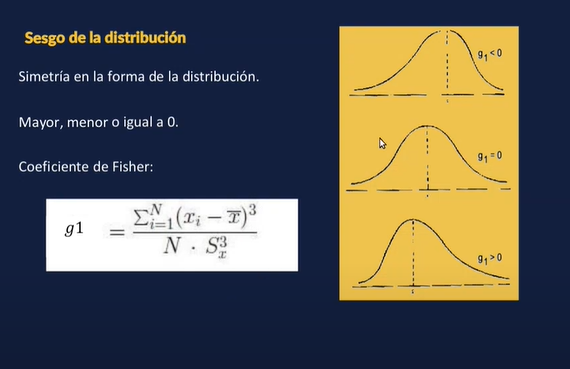

In [6]:
from IPython.display import Image
Image(filename='img/sesgo.PNG') 

Si el sesgo es menor que uno tendra un sesgo por la izquierda

La mayoria de los elementos estarán en la derecha con unos valores atipicos por la izquierda

Lo mismo pasa si el sesgo en mayor que 0

Tendremos los valores alineados a la izquierda con valores atipicos por la derecha

Se forma como una cola larga

Estos valores atipicos **Contaminan la variable**

Estos valores tambien se conocen com **OUTLIERS**

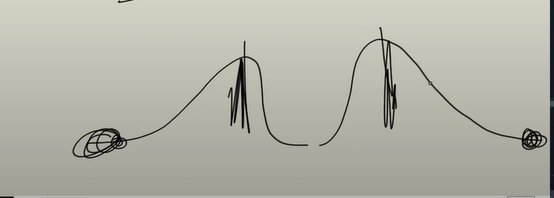

In [7]:
from IPython.display import Image
Image(filename='img/sesgo1.PNG') 

### Averiguar el SESGO de cada una de las variables

Utilizamos la funcion de pandas . Skew

Este metodo nos presenta el sesgo de cada una de las variables

In [8]:
df.skew()

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_30524\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
Dataset                        0.947140
dtype: float64

Podemos observar que **Aspartate_Aminotransferase** presenta valores muy por encima de 0

Esto significa que dentro de la variable existe un valor o varios que estan muy a la derecha de los datos

Los valores de abajo estan muy cercanos a 0, esto significa que tendrán una distribucion normal

Con la mayoria de valores en el centro de la distribucion y algunos valores en la derecha y en la izquierda.

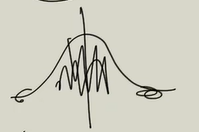

In [9]:
from IPython.display import Image
Image(filename='img/sesgo2.PNG') 

#### Veamos estos datos de manera gráfica a traves de un Histograma

Estas es la forma como confirmamos el **Sesgo** de cada variable en forma grafica

**AGE** tienen la mayoría de los valores en el centro de la grafica

Miestras que **Total_Bilirubin** vemos que la mayoria de valores se concentran en la parte izquierda

Hace vamos  confirmando los valores numericos que teniamos

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Total_Bilirubin'}>,
        <AxesSubplot: title={'center': 'Direct_Bilirubin'}>],
       [<AxesSubplot: title={'center': 'Alkaline_Phosphotase'}>,
        <AxesSubplot: title={'center': 'Alamine_Aminotransferase'}>,
        <AxesSubplot: title={'center': 'Aspartate_Aminotransferase'}>],
       [<AxesSubplot: title={'center': 'Total_Protiens'}>,
        <AxesSubplot: title={'center': 'Albumin'}>,
        <AxesSubplot: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

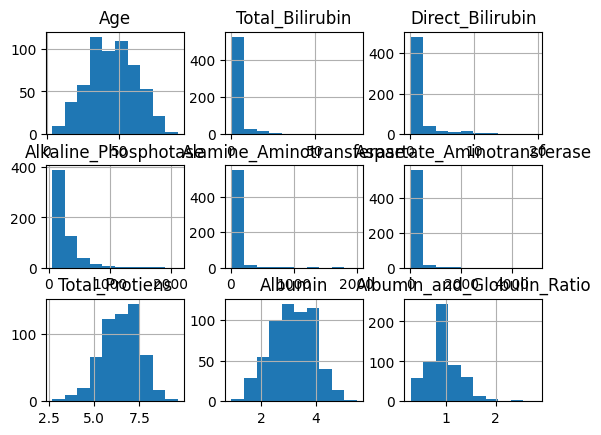

In [10]:

# Cada una de las varaiables que conforman el DATA SET
input_data = df[df.columns[:-1]]
input_data.hist()

#### Densidad

Podemos conseguri la misma grafica con los metodos de densidad

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

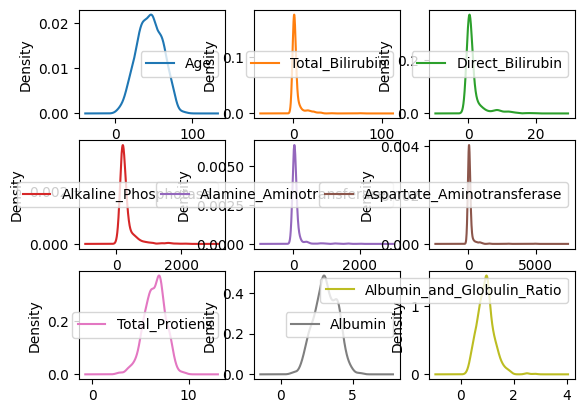

In [11]:
input_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

#### Boxplot

Muestra lo mismo solo que la caja es igual que la gráfica y los  puntos negros son **OULIERS** que se salen complemtamente d ela media.

Age                              AxesSubplot(0.125,0.653529;0.227941x0.226471)
Total_Bilirubin               AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Direct_Bilirubin              AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Alkaline_Phosphotase             AxesSubplot(0.125,0.381765;0.227941x0.226471)
Alamine_Aminotransferase      AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Aspartate_Aminotransferase    AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Total_Protiens                       AxesSubplot(0.125,0.11;0.227941x0.226471)
Albumin                           AxesSubplot(0.398529,0.11;0.227941x0.226471)
Albumin_and_Globulin_Ratio        AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

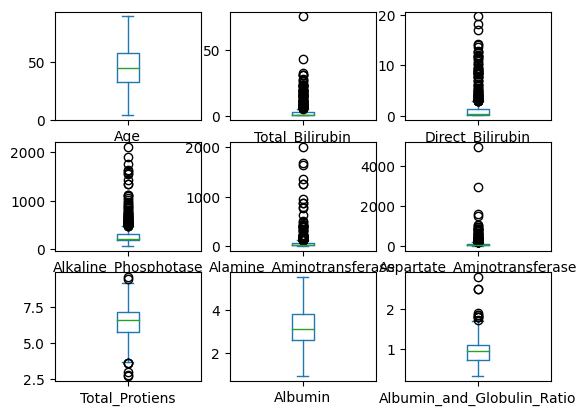

In [12]:
input_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

### Matriz de correlación

Asi no se puede quedar elporque mucho del modelo sufre

Hay que corregir el dataset

Solo se puede ser hombre o mujer.


C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_30524\1087309168.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = input_data.corr()


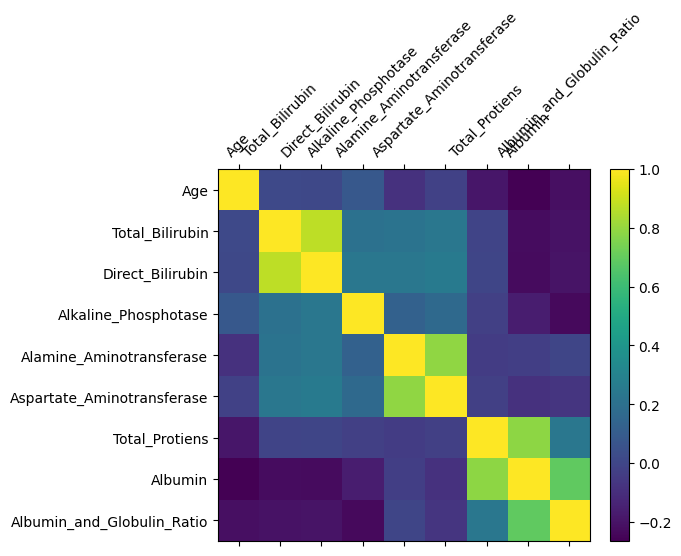

In [13]:

from matplotlib import pyplot 

correlations = input_data.corr()  
f = pyplot.figure() 
cax=pyplot.matshow(correlations, fignum=f.number) 
pyplot.xticks(range(correlations.shape[1]), correlations.columns,  rotation=45) 
pyplot.yticks(range(correlations.shape[1]), correlations.columns) 
f.colorbar(cax, fraction=0.046, pad=0.04) 
pyplot.show() 

### Matriz de dispersión 

Vemos que no hay una separabilidad entre clases

Vemos relaciones punto a punto en tre las variables

No exten patrones claramente diferenciable nia nivel lineal como no lineal

Esta matriz da poca informacion


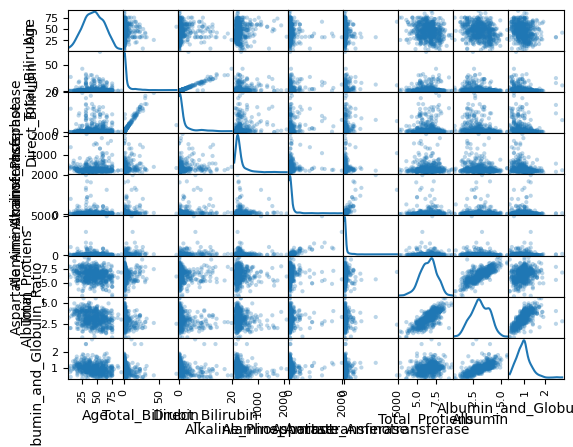

In [14]:

pd.plotting.scatter_matrix(input_data, alpha = 0.3, diagonal = 'kde'); 

**Iris** si existen patrones de separacion claros

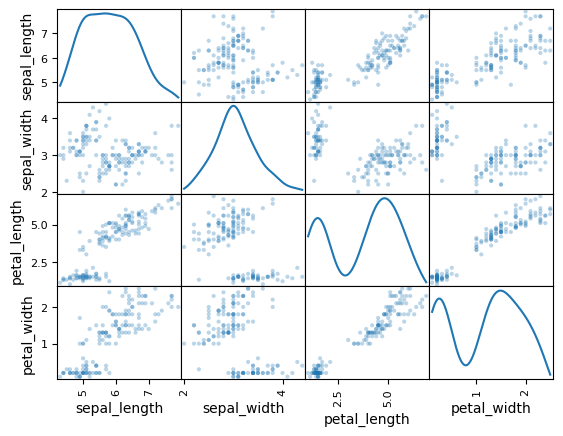

In [15]:
df1 = pd.read_csv("iris.csv")

# Cada una de las varaiables que conforman el DATA SET
input_data1 = df1[df1.columns[:-1]]

pd.plotting.scatter_matrix(input_data1, alpha = 0.3, diagonal = 'kde'); 


## Transformaciones de los datos

El preprocesamiento de los datos se hace antes del proyecto para mejorar el rendimiento de los modelos predictivos y no supervisados

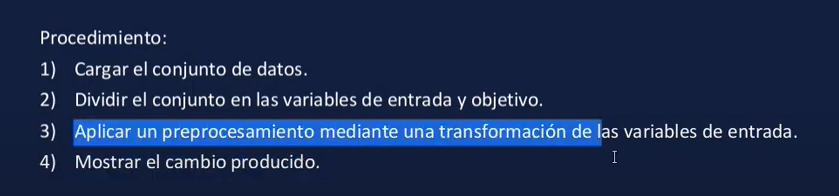

In [16]:
from IPython.display import Image
Image(filename='img/prepro.PNG') 